<img src="images/pyconus2022-logo.png" alt="drawing" width="400"/>

![banner](images/banner.png)

### Python + VPS Jupyter HUB/Notebook, aprender, enseñar, investigar, trabajar de manera colaborativa, remota y presencial
#### Fecha: 30 de Abril , 1.45 a 2.30 hs. pm
####  Sofía Martin, Ariel Ramos, Liliana Hurtado, Enzo Juárez

# ROBOTICA TALLER MODO REMOTO

## Profesor Ing. Daniel Hoyos - INENCO - Facultad Cs. Exactas
## Universidad Nacional de Salta - UNSa

# BRAZO ROBOT

### Resumen
Para diseñar y o construir un brazo robot didactico tenemos que trabajar en varios aspectos que incluyen:

1. Definición del problema
2. Análisis cinemático.
3. Análisis dinámico.
4. Diseño mecánico
5. Diseño electronico
6. Programacion

Se describira cada una de las partes del brazo didactico,
1. Componentes mecanicos
2. Motores
3. Microcontroladores 
4. Firmware
5. Software


### 1 Componentes Mecanicos
Las piezas mecanicas se construiran de carton. Para unir las partes se utiliza plasticola. 

### 2 Microcontrolador

Se utilizara un Arduino Uno como microcontrolador para controlar el brazo, una PC para controlar y simular el sistema. Se utilizara el entorno Arduino para programar las placas y Jupyter Notebook para programar la PC.
<img src="img/arduinouno.jpg" alt="Imagen"></img>





### 3 Motores
Los motores que se usaran son del tipo de servomotor.
<img src="img/servomotor.jpg"></img>


### 1. Definición del problema

Se diseñara y construira un brazo robotico de tres grados de libertad, del tipo articulado. El objetivo del mismo es didactico. Tendra tres articulaciones, Las articulaciones A1 y A2 permitiran ubicar al brazo en cualquier posicion del plano en que se encuentra el mismo. La articulacion A3 permite que siempre la mano este horizontal. Se podra ampliar el brazo de forma de agregar una pinza para sujetar objetos.

Ambos motores se colocaran en paralelo enfrentados entre si, uno de los servomotores accionara el brazo, el otro  con una serie de palancas accionara el antebrazo. En la imagen se muestra el brazo.


<img src="img/brazo00.gif" height="400" width="200"></img>

Para accionar el brazo se utilizaran dos servomotores del tipo  SG90 cuyas caracteristicas se muestran a continuación

- Peso: 9 gramos
- Dimensiones: 22.2 x 11.8 x 31 mm
- Torque: 1.8 kg.cm
- Velocidad: 0.1 s/60 grados
- Alimentación: 4.8 V (~5V)
- Temperatura de funcionamiento: 0 ºC – 55 ºC

## 2.  Cinematica del brazo 

Este analisis se divide en dos partes
Cinematica Directa: A partir de datos se obtiene las posiciones que ocupara el brazo
Cinematica inversa: A partir de la posicion que se desea que ocupe el brazo se obtiene los datos iniciales

### 2.1 Cinematica directa del brazo

La cinematica directa de un robot es la determinación de la posición y orientación del extremo de del mismo con respecto a un sistema de referencia. Con este fin se realizaran las siguientes acciones.

- Se analizara el sistema de ecuaciones de movimiento del brazo
- Se estudiara la libreria matplotlib
- Se realizara un programa para simular el movimiento


### 2.1.1 Calculo de la matriz de tranformacion

 Con este fin se analiza la geometria del brazo robot, cuyo esquema se muestra en la figura.
 <img src="img/brazo_geo.gif" alt="Imagen" width="300" height="300">Brazo</img> 

### Descripcion
El antebrazo esta dividido en dos segmentos uno de largo a y otro de largo b con la articulacion situada entre ambos segmentos.  El brazo tendra largo a. Se agregan dos palancas. Una de ellas tendra largo a y la otra tendra largo b se conectan segun se muestra en la figura Formando un paralepipedo. Esto permite que las ecuaciones de movimiento tengan relaciones trigonometricas simples. 


### Ecuaciones x1,y1

Se Analizaran las ecuaciones comenzando por el punto(x1,y1) que corresponde a la segunda articulación A2 seria:

<center><b><i> x1=a.$\cos$(ang1) </b></i></center> 
<center><b><i> y1=a.$\sin$(ang1) </b></i></center> 

<img src="img/brazo_geo.gif" alt="Imagen" width="300" height="300">Brazo</img> 

### Ecuaciones x2,y2

Finalmente el punto (x2,y2) tendria la siguiente ecuación:  

<center><b><i>x2=a.$\cos$(ang1)+a.$\sin$(ang2)  </b></i></center>
<center><b><i>y2=a.$\sin$(ang1)-a.$\cos$(ang2)  </b></i></center>



Se observa que la posicion del brazo depende de dos angulos ang1 y ang2. Los cuales corresponderian a los angulos de los dos servomotores. Pero es conveniente que la posicion de 90° del ang1 y ang2 sea con el brazo vertical. Entonces 

<center><b><i>ang1=angs1-90 </b></i></center>

<center><b><i>ang2=angs2-90 </b></i></center>



### sistema de ecuaciones:

<center><b><i>x=a.$\sin$(angs1)+a.$\cos$(angs2))  </b></i></center>

<center><b><i>y=a.$\cos$(angs1)-a. $\sin$(angs2))  </b></i></center>



### Optimizacion brazo
Para obtener que el ultimo segmento del robot este siempre horizontal, se debe agregar un nuevo grupo de palancas y secciones de conexion que permitan cumplir con ese cometido. En la figura se muestra la nueva configuración.

<img src="img/brazo_geo1.gif" alt="Imagen" width="300" height="300">Brazo</img> 



 En amarillo se muestran dos palancas  y dos triangulos iguales  que se agregan al brazo. Los triangulos son rectangulos: Uno esta fijo a la base y el otro se coloca el la articulacion (x1,y1). Las palancas tienen el largo a. Se colocan formandos dos paralelogramos, como se muestra en la figura. El segmento d por propiedad de los paralelogramos siempre queda vertical. Lo que permite que el ultimo segmento este vertical o en el angulo que el problema lo requiera. Analizando geometricamente, se concluye que el sistema cambia agregando una componente en y y otra en x que tienen que ver con la traslacion del extremo
 
<center><b><i>x=a.$\sin$(angs1)+a.$\cos$(angs2)+x0)  </b></i></center>

<center><b><i>y=a.$\cos$(angs1)-a. $\sin$(angs2+y0))  </b></i></center>
 

Dado que el sistema tiene pocos grados de libertad, el problema cinematico directo se encuentra resuelto. En el siguiente punto se analizara la libreria matplotlib


## Simulacion del movimiento del brazo

En esta seccion se describiran brevemente las librerias que se usaran para simular el movimiento

| Libreria |  Funcion |
|---       |---       |
|Matplotlib| grafica en python|
|numpy     | crea vectores, tiene funciones trigonometricas |
|optimize  | Permite resolver sistemas de ecuaciones        |
ipywidgets | Uso de Botones |

####  2.1.2 Libreria Matplotlib

Esta libreria tiene pyplot y path

|libreria         | Accion |      |
|---              |---     |---   |
|matplotlib.pyplot| coleccion de funciones para graficar similar a matlab|
|matplotlib.path  |con estas funciones se puede:| crear figuras    |
|                 |                             | cambiar figuras  |
|                 |                             |dibujar un area   |
|                 |                             |dibujar lineas    |
|                 |                             | rectangulos      |
|                 |                             |esferas etc.      |



### Ejemplo de programa

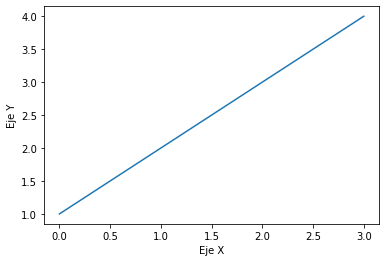

In [2]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('Eje Y')
plt.xlabel('Eje X')

plt.show()

### Descripción el programa 

| nombre  |  sintaxis                          |        Accion                                          |
| :---    | :---                               | :---                                                   |
|pyplot   |*_import matplotlib.pyplot as plt_* |Carga las funciones pyplot con nombre plt en el programa.|  
| plot    | *_plt.plot([1, 2, 3, 4])_*         |Grafica la secuencia 1,2,3,4  |
| ylabel  |*_plt.ylabel('Eje Y')_*             | Escribe un letrero en el eye y  |
|ylabel   |*_plt.xlabel('Eje X')_*             | Escribe un letrero en el eye x  |
|show     |*_plt.show()_*                      | Muestra el resultado  |


Se presenta un programa que muestra un rectangulo, circulo linea y poligono.


### Funciones importantes para realizar la simulacion 

| nombre    |    sintaxis      |   accion      |
|:---       |:---              | :---          |
|  figure   |fig = plt.figure()|crea una figura|
| set_dpi   |fig.set_dpi(80)   |fija la resolucion|
| set_size_inches|fig.set_size_inches(4, 4)| tamaño de la figura|
| axes      |ax = plt.axes(xlim=(0, 40), ylim=(0, 40))| crea los  ejes de la imagen |
|line       |linea = plt.Line2D((x1, x2), (y1, y2), lw=2.5)| Crea una linea|
|  Poligon  |lin1 = plt.Polygon(point1, closed=None, fill=None, edgecolor='r', linewidth=2)| crea un poligono|
|add_line   |ax.add_line(lin1)| Agrega lineas a una figura|
|rectangle  |rec=Rectangle((x,y), ancho, largo, angulo,opciones)| Crea un rectangulo
|add_path   | ax.add_patch(rex) | Agrega la forma a la imagen    |


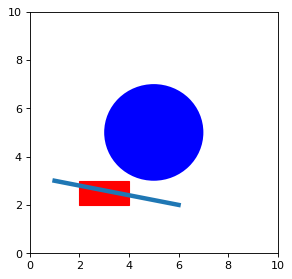

In [4]:
from matplotlib import pyplot as plt
from matplotlib import path
fig = plt.figure()
fig.set_dpi(80)
fig.set_size_inches(4, 4)
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
circulo = plt.Circle((5, 5), 2, fc='blue')
linea = plt.Line2D((1, 6),(3, 2), lw=4)
rectangulo=plt.Rectangle((2,2),2,1,0,color="red")
ax.add_patch(circulo)
ax.add_patch(rectangulo)
ax.add_line(linea)

### Libreria numpy 

Es una biblioteca de Python para trabajar con matrices y vectores.  El principal tipo de dato es el vector o matriz (arreglo o array). Permite trabajar con la semántica de matrices y ofrece muchas funciones útiles para el procesamiento de números. Esta libreria tiene definida las funciones seno y coseno. 

|Nombre 	|Sintaxis            |	Acción|
| :---      | :---               | :---  |
| numpy     | import numpi as np |  carga la libreria numpy cada funcion debe comenzar con np. |
| sin       | x=150*np.sin( ang) |  Función seno                                               |
| cos       | y=150*np.cos(ang)  |  Función coseno                                             |
|  pi       | a=np.pi            | Número pi                                                   |


### Libreria optimize
Permite resolver un sistema de ecuaciones

|Nombre 	|Sintaxis              |	Acción|
| :---      | :---                 | :---  |
|optimize  | from scipy.optimize import fsolve |carga la funcion folve de  optimize|
| fsolve   | z=fsolve(coorde,[1,1],args=(x00,y00))| resuelve la ecuacion coorde|



### Libreria ipywidget
Es una biblioteca que permite agregar interactividad a Jupyter notebook.


|Nombre      |Sintaxis                 |	Acción|
|:---        | :---                    | :---   |
|ipywidgets  | import ipywidgets as wd | Carga la libreria ipywidgets cada funcion debe comenzar con wd. |
| interact   | wd.interact( funcion,var1=(1,100),var2)=(1,100)|ejecuta en forma interactiva la funcion fun y sus variables var1 y var2 con valores entre 1 y 100 |


### Simulación del movimiento
En esta seccion se dibujara el brazo robot, se calculara la posición de los extremos del brazo. Se agregara interactividad.

### Dibujo del brazo 1
El brazo tendra en principio dos segmentos como se muestra en la figura
Se comenzara dibujando solos los segmentos del brazo. En el programa se muestra el mismo

In [4]:
from matplotlib import pyplot as plt
from matplotlib import path
def dibujo():
    fig = plt.figure()
    fig.set_dpi(80)
    fig.set_size_inches(4, 4)
    ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
    linea1 = plt.Line2D((3, 5),(1 ,5), lw=4)
    linea2 = plt.Line2D((5,8),(5 ,1), lw=4)
    rectangulo=plt.Rectangle((2,0),2,1,0,color="red")
    ax.add_patch(rectangulo)
    ax.add_line(linea1)
    ax.add_line(linea2)

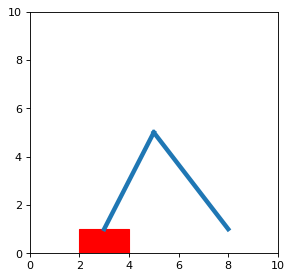

In [5]:
dibujo()

En la figura se muestra las cargas que debe soportar el motor del brazo fijo a la base roja.  Entonces se debera tratar de disminuir la carga sobre ese motor. Entonces se colocara el segundo motor sobre la base roja enfrentado al primero y  con un sistema de palanca se accionara el antebrazo.  



#### 2.1.3 Simulacion del movimiento de un brazo robotico
Se simulara en la PC las posiciones del brazo. Se utilizara la libreria numpy

Se comenzara analizando el sistema sin la mano ni el sistema para mantenerla horizontal. Las ecuaciones ya deducidas son:
  
<center><b><i>x=a.$\sin$(angs1)+a.$\cos$(angs2))  </b></i></center>

<center><b><i>y=a.$\cos$(angs1)-a. $\sin$(angs2))  </b></i></center>
El programa se muestra en la siguiente seccion. Cambiando el valor de o1 y o2 se obtiene distintos puntos del extremo del brazo. Se supone que la distancia a es 150 mm


In [6]:
import numpy as np

o1=30
o2=30
x=150*(np.sin(o1/180*np.pi)+np.cos(o2/180*np.pi))
y=150*(np.cos(o1/180*np.pi)-np.sin(o2/180*np.pi))
dd='x='+str(x)+' y='+str(y)+'\n'
print(dd)

x=204.9038105676658 y=54.903810567665815



En el siguiente programa se simulara el movimiento del brazo robot utilizando la libreria matplot y numpy se debe modificar el valor de o1 y o2 para obtener las distintas posiciones del brazo.Se utilizan dos funciones. 

|Nombre      |sintaxis           |accion|
|---         |---                |---   |
|coordenadas |coordenadas(o1,o2) | Devuelve en el vector x e ylas posiciones de cada uno de los segmentos|
|dibujo_brazo|dibujo_brazo(o1,o2)| Dibuja el brazo robot                                                 |

## Funcion coordenada

In [7]:
import numpy as np
def coordenadas(o1,o2):
    a=15
    b=5
    d=7
    o3=30
    x=np.empty((6))
    y=np.empty((6))
    x[0]=8
    y[0]=1
    x[1]=x[0]+a*np.cos((180-o1)/180*np.pi)
    y[1]=y[0]+a*np.sin((180-o1)/180*np.pi)

    x[2]=x[1]+a*np.cos((180-o2)/180*np.pi)
    y[2]=y[1]-a*np.sin((180-o2)/180*np.pi)

    x[3]=x[1]-b*np.cos((180-o2)/180*np.pi)
    y[3]=y[1]+b*np.sin((180-o2)/180*np.pi)

    x[4]=x[0]-b*np.cos((180-o2)/180*np.pi)
    y[4]=y[0]+b*np.sin((180-o2)/180*np.pi)

    x[5]=x[0]-0.01
    y[5]=y[0]

    x6=x[0]-d*np.cos(o3/180*np.pi)
    y6=y[0]-d*np.sin(o3/180*np.pi)
    x7=x[1]-d*np.cos(o3/180*np.pi)
    y7=y[1]+d*np.sin(o3/180*np.pi)

    x8=x[1]
    y8=y[1]+d*np.sin(o3/180*np.pi)

    x9=x[2]
    y9=y[2]+d*np.sin(o3/180*np.pi)

    x10=x[2]+4
    y10=y[2]
    return(x,y)



### Función dibujo_brazo

In [8]:

from matplotlib import pyplot as plt
from matplotlib import path
def dibujo_brazo(o1,o2):
    fig = plt.figure()
    fig.set_dpi(80)
    fig.set_size_inches(6, 6)
    ax = plt.axes(xlim=(0, 40), ylim=(-20, 20))
    [x,y]=coordenadas(o1,o2)
    point1 = [[x[0], y[0]], [x[1],y[1] ]]
    point2 = [[x[2], y[2]], [x[3],y[3] ]]
    point3 = [[x[3], y[3]], [x[4],y[4]], [x[5],y[5] ]]
    lin1 = plt.Polygon(point1, closed=None, fill=None, edgecolor='b', linewidth=4)
    lin2 = plt.Polygon(point2, closed=None, fill=None, edgecolor='g', linewidth=4)
    lin3 = plt.Polygon(point3, closed=None, fill=None, edgecolor='black', linewidth=2)
    rectangulo=plt.Rectangle((4,0),8,1,0,color="red")
    ax.add_line(lin1)
    ax.add_line(lin2)
    ax.add_line(lin3)
    ax.add_patch(rectangulo)
    return(x[2],y[2])

(23.000000000000004, 1.0)

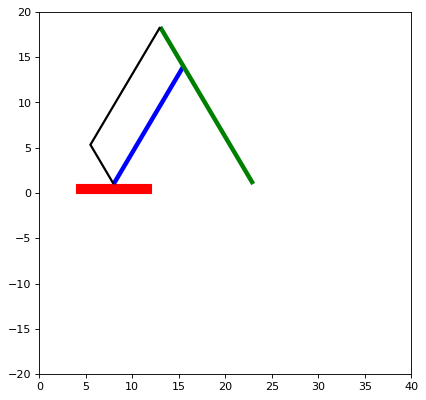

In [9]:
dibujo_brazo(120,120)

 Se utilizara la sentencia interact para poder modificar los angulos sin necesidad de modificar el programa. Se agrega la libreria ipywidgets que tiene la funcion interacts que permite modificar variables






In [10]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wd

interact (dibujo_brazo, o1=(90,180),o2=(90,180))

interactive(children=(IntSlider(value=135, description='o1', max=180, min=90), IntSlider(value=135, descriptio…

<function __main__.dibujo_brazo(o1, o2)>

###  2.2 Cinematica inversa

 Cinemática inversa es la técnica que permite determinar el movimiento de un robot para lograr que una parte del mismo se ubique en una posición concreta. 

El brazo robotico debe poder ubicar la mano en una posicion determinada. Se debe determinar los valores de los angulos o1=ang1, o2=ang2 en funcion de las posiciones x2 e y2 del extremo de la mano del robot. 

Matematicamente significa que se debe resolver el sistema de ecuaciones obtenido. 
<img src="img/brazo_geo1.gif" alt="Imagen" width="300" height="300">Brazo</img> 

La posicion de este punto esta descripto en las siguientes ecuaciones:

|                                                         |
|:---                                                     |
| $ x=x0+a.cos(\frac{180-o1}{180}.\pi)+a.cos(\frac{180-o2}{180}\pi) $ |  
| $ y=y0+a.sin(\frac{180-o1}{180}.\pi)-a.sin(\frac{180-o2}{180}\pi)$ |  



Este sistema de ecuaciones se resolvera utiizando un metodo aproximado. En ese sentido se usa la libreria *__optimize__* para resolver las ecuaciones y la libreria *__numpy__* donde esta definida las funciones *__seno__* y *__coseno__* 

| Funcion     | libreria      |   sintaxis      | acciones                         |
|:---         | :---          | :---            | :---                             |
| seno        |  numpy        | _x=np.sin_      |  calcula el seno de una funcion  |
| coseno      |  numpy        | _x=np.sin_      |  calcula el coseno de una funcion|
| fsolve      | scipy.optimize| _z=fsolve(coorde,[1,1],args=(x00,y00))_| resuelve la ecuacion coorde|



### Solución

Se resuelve el sistema de ecuaciones, en una funcion en este caso *__coorde__* para lo cual se debe proponer una primera solución en este caso (0,0) y finalmente los valores x00 y y00. Modificando los mismos se obtiene los angulos que definen la posicion del brazo.

In [11]:
import numpy as np
from scipy.optimize import fsolve

def coorde(z,x00,y00):
    o1=z[0]
    o2=z[1]
    F=np.empty((2))
    F[0]=150*(np.cos((180-o1)/180*np.pi)+np.cos((180-o2)/180*np.pi))-x00
    F[1]=150*(np.sin((180-o1)/180*np.pi)-np.sin((180-o2)/180*np.pi))-y00
    return F


In [12]:
x00=150.0
y00=0.0
z = fsolve(coorde,[1,1],args=(x00,y00))
print(z)

[120. 120.]


## 3. Dinamica del robot
Esta sección estaa en construcción

## 4. Diseño mecanicas del robot

Para construir el brazo se utilizara como material carton, este material es muy liviano y se puede hacer rigido, para unir las piezas movibles se utiliza remaches pop, los cuales deben ser desarmados para utilizar los mismos como bujes. En la figura se muestra el brazo terminado. Se usa este material por su bajo precio lo que permite experimentar con distintas posibilidades.

<img src="img/brazo_robot.jpg" width="300" height="300" > </img>

Para comenzar a armar el brazo se debe construir dos rectangulos de carton de 16 cm de largo y 1 cm de ancho. Los cuales deben tener dos orificios en el medio separados entre si 15 cm y un apoyo de carton de 5.5 x 3 cm  que debe tener la cabeza de un remache pop como se muestra en la figura.

<img src="img/WhatsApp%20Image%202020-12-10%20at%205.34.09%20PM.jpeg" width="300" height="300"></img>
Se deben unir los dos rectangulos con el apoyo utilizando el remache como se muestra en la figura
<img src="img/WhatsApp%20Image%202020-12-10%20at%205.42.31%20PM.jpeg" width="300" height="300"></img>

Se colocan separadores de carton
<img src="img/WhatsApp%20Image%202020-12-10%20at%205.42.45%20PM.jpeg"  width="300" height="300"></img>

Se construye un rectangulo de 21 cm de largo y 1 cm de ancho con tres orificios alineados en el medio, uno a 0,5 cm el siguiente con un remache en el orifico ubicado a 15.5 cm y finalmente otro a 20 cm com se muestra en la figura.
<img src="img/WhatsApp%20Image%202020-12-10%20at%205.44.07%20PM.jpeg"  width="300" height="300"></img>

Se conecta a las piezas anteriores como se muestraa en la figura
<img src="img/WhatsApp%20Image%202020-12-10%20at%205.44.52%20PM.jpeg"  width="300" height="300"></img>
Se construye una base de 10 x 10 cm se realiza un agujero de 2cm por 3mm exactamente en el medio. Se coloca la pieza armada en la base como se muestra en la figura.
<img src="img/WhatsApp%20Image%202020-12-10%20at%206.03.06%20PM.jpeg" width="300" height="300"  width="300" height="300"></img>
Finalmente el brazo queda asi
<img src="img/WhatsApp%20Image%202020-12-10%20at%206.03.37%20PM.jpeg" width="300" height="300"></img>
Sobre la pieza que corresponde al brazo se pega con silicona el brazo del servomotor
<img src="img/WhatsApp%20Image%202020-12-10%20at%206.30.21%20PM.jpeg" width="300" height="300"></img>
se deben realizar un rectangulo de 6cm de largo por uno de ancho con dos orificis centrados a 5 cm uno del otro. Otro rectangulo de 16cm x1 cm con dos orificios centrados separados entre si 15 cm. Se deben conectar entre si con el extremo libre del rectangulo de 20 cm. y colocar un brazo del servo al extremo libre del rectangulo de 5 cm.
<img src="img/WhatsApp%20Image%202020-12-10%20at%206.59.04%20PM.jpeg" width="300" height="300"></img>
Se debe pegar los servos quedando el brazo robotico como la figura
<img src="img/brazo_robot.jpg" width="300" height="300"></img>  
Las medidas de algunas piezas se muestran en la figura.
<img src="img/robot_med.gif" width="300" height="300"></img>


### Fuerzas que intervinen en el brazo

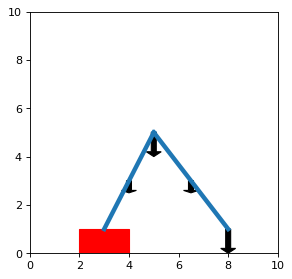

In [13]:
from matplotlib import pyplot as plt
from matplotlib import path
fig = plt.figure()
fig.set_dpi(80)
fig.set_size_inches(4, 4)
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
linea1 = plt.Line2D((3, 5),(1 ,5), lw=4)
linea2 = plt.Line2D((5,8),(5 ,1), lw=4)
flecha1= plt.Arrow(5,5,0,-1,width=1,color="black")
flecha2= plt.Arrow(8,1,0,-1,width=1,color="black")
flecha3= plt.Arrow(6.5,3,0,-0.5,width=1,color="black")
flecha4= plt.Arrow(4,3,0,-0.5,width=1,color="black")


rectangulo=plt.Rectangle((2,0),2,1,0,color="red")
ax.add_patch(rectangulo)
ax.add_patch(flecha1)
ax.add_patch(flecha2)
ax.add_patch(flecha3)
ax.add_patch(flecha4)
ax.add_line(linea1)
ax.add_line(linea2)

### 5. Diseño y construcción de las partes electromecanicas y electronicas del brazo robot

Se detallan los componentes necesarios para la cosntrucción del robot

#### arduino uno 

<img src="img/arduinouno.jpg" width="300" height="300" alt="Imagen"></img>

#### Protoboard   

<img src="img/protoboard.jpg" width="300" height="300" alt="Imagen"></img>

#### servo

<img src="img/servomotor.jpg" width="300" height="300" alt="Imagen"></img>

#### cables       

<img src="img/cable_dupont.jpg" width="300" height="300" alt="Imagen"></img>

Se deben conectar dos servomotores al arduino uno. Cada servo tiene tres cables, en general la distribucion de cables es la mostrada en la tabla.  

|Color | Funcion |
| :--- | :---    |
|Rojo  |  vcc    |
|Negro |  Gnd    |
|Amarillo/| Control|
|naranja  |        |


Utilizando los cables dupont Se conectan las masas (gnd) de los servomotores a la linea azul del protoboard, los cables vcc a la linea roja. Alguno de los pines de masa (gnd) del arduino a la linea azul y los cables naranja segun la tabla.  

|Servomotor | Pin     |
| :---      | :---    |
| Brazo     |   |0    |
|Antebrazo  |   11    |

<img src="img/brazo_elec.png" width="300" height="300"></img>]

## Aqui se muestra de el Video del Servomotor usando un Link
* En este video se muestran detalles del funcionamiento del servomotor
 
[Servomotores](https://youtu.be/mk9UkQCeENc)

## Aqui se muestra de el Video del Servomotor con:
## el Metodo YouTubeVideo del Modulo IPython.display
* En este video se muestran detalles del funcionamiento del servomotor
 

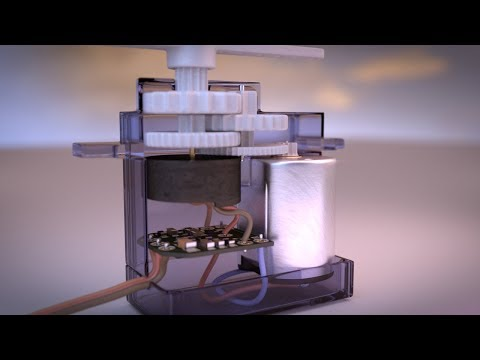

In [14]:

from IPython.display import YouTubeVideo

YouTubeVideo('mk9UkQCeENc', width=800, height=600)



La posicion de reposo de los servomotores es 90°  
En las figuras se muestra el circuito construido.  

|         |                    |
|:---                | :---                         |
|<img src="img/WhatsApp%20Image%202020-12-10%20at%207.08.04%20PM.jpeg" width="300" height="300"></img>| <img src="img/WhatsApp%20Image%202020-12-10%20at%207.10.13%20PM.jpeg" width="300" height="300"></img>|





## 6. Programacion
La programación del robot en este caso tiene dos partes
- Firmware: La programación del microcontrolador
- Software: La programación del la PC

El microcontrolador y la PC en este caso se comunican a traves del puerto serie. Lo que permitira posteriormente utilizar el puerto bluetooth. Se debe realizar un protocolo que permita comunicar ambas partes del robot. 

El protocolo propuesto seria

|Identificador   |  Número    |   angulo  | accion |
|:---            | :---       | :---      | :---   |
|o               |   1        | 012       | ubicar al servomotor brazo en el angulo 12 grados|
|                |   2        | 098       | ubicar al servomotor antebrazo en el angulo 98 grados|

Se debe completar con zeros hasta conseguir las tres cifras por ejemplo 1 se debe poner 001


### 6.1 Programacion del microcontrolador (firmware)

El microcontrolador se encargara de controlar los servo motores, en este caso se utilizaran los puertos 10 y 11 como se indico en la seccion 5. y se comunicara con el PC a traves del puerto serie.



#### 6.1.1 Programa para control de un servomotor

En esta seccion presentamos un programa sencillo para controlar un servomotor.

| Codigo          |            |
|  :---           | :---       |
|include Servo.h  |            |
|Servo brazo;     |            |
|void setup()     |            |
|                 |{           |
|                 |}           |
|void loop() {    |            |
|                 |int i; |
|                 |brazo.attach(11);   //brazo esta conectado ala pata 11   |
|                 |delay(10);    |
|                 |brazo.write(50);   |
|                 |delay(2000);  |
|                 |brazo.write(90);  |
|                 |delay(2000);   |
|                 |while (1)  { |
|                 | brazo.detach();  |
|                 |}                 |
|}                |                  |

    
Se comienza cargando la libreria servo con la sentencia **#include <Servo.h>**

Luego se crea el objeto servo a partir del cual se utiliza el servomotor por el microcontrolador la sentencia es **Servo nombre_servo**

Para informar a que pin del micrcontrolador se conecta e utiliza la sentencia attach donde se debe escribire el mumero de pin donde se conectara el servomotor  **nombre_servo.attach(numero)**

Utilizando la sentencia write se ordena al servo el angulo en el cual se debe ubicar, la sentencia se muestra a continuacion
**nombre_servo.write(90)**

Finalmente la sentencia detach desconecta el servomotor **brazo.detach()**

#### 6.1.2 Programa para controlar dos servomotores utilizando la  Puerto Serie

Un Puerto Serie (también denominado Puerto Serial) es la interfaz (conexión física y funcional entre dos dispositivos o sistemas) que posibilita el envío de información digital y a su vez también permite recibirla. En este caso se conecta el puerto serie del microcontrolador con el puerto serie de la PC donde se encuentra nuestro programa. Se debe destacar que el arduino utiliza para conectarse con una PC el puerto USB  configurado como puerto serie.

Se presenta un programa que permita controlar dos servomotores utilizando la puerta serie

| codigo       |                               |    
| :---         | :----          | 
|#include <Servo.h>|                               |
| | |//libreria donde encuentra la clase  |                  
|Servo brazo;  |                               |
|Servo antebrazo;|                               | 
|int ang_brazo = 90;|      |                               |
|int ang_antebrazo = 90;  |                               |
|void setup() {|                               |
|Serial.begin(9600);|
|}               |                |
|void loop() { |                |                |
|int i;          |              | 
|char a;         |              |  
|String cad;     |            | 
|char control[5];|                                            
| int valor;     |                               
|brazo.attach(10);|
|//brazo esta conectado al pin 11  |                     
|antebrazo.attach(11);|
|//antebrazo esta conectado al pin 10  |                 
|if (Serial.available() > 0){|
|//Pregunta si hay datos en el buffer del puerto serie |                                 |
|Serial.readBytes(control, 5); |
|//lee 5 byte de la puerta serie en control |             |                              |
|if (control[0] == 'o'){|                  |                | 
| Serial.print(control);|  
|if (control[1] == '1') {|  
|        cad = "";  |
|cad = cad+control[2] + control[3] + control[4];|    
|        valor = cad.toInt();// convierte el valor medido a entero|  
|        brazo.write(valor);  //escribe en el servo  |
|      }  |
|      if (control[1] == '2') | 
|      {  |
|        cad = "";|  
|        cad = cad+control[2] + control[3] + control[4];|  
|        valor = cad.toInt();  |
|        antebrazo.write(valor);|  
|      }  |
|    }  |
|  }  |
|}  |


### 6.2 Programacion de la PC



#### 6.2.1 Puerta Serie en Jupyter notebook

Se utiliza la libreria serial, se describen algunas funciones de la libreria.  

| Funcion     |    sintaxis        | acciones                                    |
|:---         |  :---               | :---                                       |
| serial      | import serial as se | habilita las funciones del puerto serie    |              
|Serial       | ser=se.Serial(COM1) |selecciona el puerto COM1 su nombre sera se |
|close        |  ser.close()        | cierra la conexion serie                   |
|write        |  ser.write(b'o1120')| Escribe en el puerto la palabra o11120     |
|             |                     | se agrega la b para indicar que es un ascii|
|read         | a=ser.read()        | Función que lee un caracter                |
|             | a=ser.read(3)       | Función que lee tres caracteres            |
|readline     | a=ser.readline()    | Función que lee una linea completa         |
|flush        | ser.flush()         | Función que se utiliza para vaciar el buffer|
|             |                     | del puerto serie                            |


### Movimiento del Brazo robot

Un programa de control a traves de la PC debe:
1. Conectar el puerto serie
2. Enviar las ordenes
3. Desconectar el puerto serie

#### Conectar el puerto serie

In [14]:
import serial as se
ser=se.Serial('COM4')

ModuleNotFoundError: No module named 'serial'

#### Enviar las ordenes

In [15]:
ser.write(b'o1090')
ser.write(b'o2010')

NameError: name 'ser' is not defined

In [16]:
def mover_brazo (o1,o2,o3):
    to1= 'o1'+'{:03d}'.format(int(o1))
    ser.write(bytearray(to1,'utf-8'))
    to2= 'o2'+'{:03d}'.format(int(o2))
    print (to2)
    ser.write(bytearray(to2,'utf-8'))
    to3= 'o3'+'{:03d}'.format(int(o3))
    print (to3)
    ser.write(bytearray(to3,'utf-8'))

In [17]:
mover_brazo(80,0,100)

NameError: name 'ser' is not defined

#### Desconectar el puerto

In [18]:
ser.close()

NameError: name 'ser' is not defined

### Introduccion a la programacion por eventos en jupyter notebook

Para realizar programacion por eventos se debe:

1. Llamar la libreria ipywidgets
2. Definir los botones
3. Colocar un contenedor





#### Llamar la libreria ipywidgets

En esta libreria se encuentran implementada todas las funciones necesarias para la programacion por eventos. La sintaxis es la que se muestra a continuación.

__import ipywidgets as ws__ 

Se dispone de dos tipos de controles: 
1. Botones 
2. Contenedores

### Botones

Permite realizar acciones 

| Botones  |Sintaxis| Función|
|---       |---     |---     |
| Texto    |tang1 = widgets.Text(value='90',description='Ang 1=', )| visualiza un texto
| Letreros |lab1=widgets.Label(value="Entrada:")| Presenta un letrero|
|Ejecucion | brazo = widgets.Button(description='Brazo')| Ejecuta funciones predefinidas
|Salida    | out    |Permite visualizar los resultados |



### Contenedores

Permite organizar los botones dentro de la pantalla

|Botones|  Sintaxis |Funcion|
|---    |---        |---    |
|Horizontal|b1=widgets.HBox([lab1,tang1,tang2 ])| AAgrupa los botones uno despues del otro en forma horizontal|
|Vertical|b2=widgets.VBox([lab1,tang1,tang2 ])| AAgrupa los botones uno despues del otro en forma vertical|

### Ejemplo
Se crea un letrero que tiene como valor entrada

In [19]:
lab1=widgets.Label(value="Entrada:")
widgets.HBox([lab1])

NameError: name 'widgets' is not defined

### Botones ejecución

Requieren realizar dos pasos extras:
1. Definir la funcion que se ejecutara
2. Vincular la funcion al boton de ejecución


### Ejemplo de ejecución

In [20]:
import ipywidgets as widgets

def funcion_prueba(_):
      with out:
          # Acciones
          print ('hola')
Boton1 = widgets.Button(description='Prueba')
out = widgets.Output()
Boton1.on_click(funcion_prueba)

widgets.VBox([Boton1,out])

In [21]:
# librerias necesarias para el programa

from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import serial

#  definicion de botones
tang1 = widgets.Text(value='90',description='Ang 1=', )
tang2 = widgets.Text(value='90',description='Ang 2=', )
brazo = widgets.Button(description='Brazo')
abrazo = widgets.Button(description='Antebrazo')
lab1=widgets.Label(value="Entrada:")
lab2=widgets.Label(value="Salida:")
ser = serial.Serial('COM4')
out = widgets.Output()
# Contenedores
b1=widgets.HBox([lab1,tang1,tang2 ])
b3=widgets.HBox([brazo,abrazo, out])


def on_brazo_click(_):
      with out:
          # Accione
          clear_output()
          to1= 'o1'+'{:03d}'.format(int(tang1.value))
          
          ser.write(bytearray(to1,'utf-8'))
          
          print('o1= '+to1)
def on_abrazo_click(_):
      with out:
          # Accionesser = serial.Serial('COM11')
       
          to2= 'o2'+'{:03d}'.format(int(tang2.value))
          ser.write(bytearray(to2,'utf-8'))
         
          print('o2= '+to2)

brazo.on_click(on_brazo_click)
abrazo.on_click(on_abrazo_click)


widgets.VBox([b1,b3])

ModuleNotFoundError: No module named 'serial'

In [22]:
ser.close()

NameError: name 'ser' is not defined

In [23]:
 ser.close()
    

NameError: name 'ser' is not defined

 #### 6.2.4 Programa que permite mover el brazo  y visualizar la simulación

Combinando el programa mostrado en la sección 3.2.1 con el anterior se podra visualizar la simulacion y mover el brazo al mismo tiempo.

In [24]:
ser.close()

NameError: name 'ser' is not defined

In [25]:
# librerias necesarias para el programa

from IPython.display import display, Markdown, clear_output
from ipywidgets import interact
import serial
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import path
%matplotlib inline
plt.ion()
ser = serial.Serial('COM3')
def coordenadas(o1,o2):
    a=15
    b=5
    d=7
    o3=30
    x=np.empty((6))
    y=np.empty((6))
    x[0]=8
    y[0]=1
    x[1]=x[0]+a*np.cos((180-o1)/180*np.pi)
    y[1]=y[0]+a*np.sin((180-o1)/180*np.pi)

    x[2]=x[1]+a*np.cos((180-o2)/180*np.pi)
    y[2]=y[1]-a*np.sin((180-o2)/180*np.pi)

    x[3]=x[1]-b*np.cos((180-o2)/180*np.pi)
    y[3]=y[1]+b*np.sin((180-o2)/180*np.pi)

    x[4]=x[0]-b*np.cos((180-o2)/180*np.pi)
    y[4]=y[0]+b*np.sin((180-o2)/180*np.pi)

    x[5]=x[0]-0.01
    y[5]=y[0]
    return(x,y)
@interact(o1=(0,180),o2=(0,180))
def dibujo_brazo(o1,o2):
    fig = plt.figure()
    fig.set_dpi(80)
    fig.set_size_inches(6, 6)
    ax = plt.axes(xlim=(-20, 20), ylim=(0, 40))
    [x,y]=coordenadas(o1,o2)
    point1 = [[x[0], y[0]], [x[1],y[1] ]]
    point2 = [[x[2], y[2]], [x[3],y[3] ]]
    point3 = [[x[3], y[3]], [x[4],y[4]], [x[5],y[5] ]]
    lin1 = plt.Polygon(point1, closed=None, fill=None, edgecolor='b', linewidth=4)
    lin2 = plt.Polygon(point2, closed=None, fill=None, edgecolor='g', linewidth=4)
    lin3 = plt.Polygon(point3, closed=None, fill=None, edgecolor='black', linewidth=2)
    rectangulo=plt.Rectangle((4,0),8,1,0,color="red")
    to1= 'o1'+'{:03d}'.format(int(o1))
    ser.write(bytearray(to1,'utf-8'))
    to2= 'o2'+'{:03d}'.format(int(o2))                      
    ser.write(bytearray(to2,'utf-8'))
    ax.add_line(lin1)
    ax.add_line(lin2)
    ax.add_line(lin3)
    ax.add_patch(rectangulo)
    plt.show
    return(x[2],y[2])


ModuleNotFoundError: No module named 'serial'

In [26]:
ser.close()

NameError: name 'ser' is not defined

Le presentamos un video de como funciona el sistema.  
<video src="img/brazo1.mp4" width=640  height=640 controls >


#### 6.2.5 Programa paraa mover a cordenadas xy el brazo
Se presenta el programa que ubica el punto del robot en  x2,y2 en la posicion deseada. 

In [27]:
ser = serial.Serial('COM4')

NameError: name 'serial' is not defined

In [28]:
# librerias necesarias para el programa

from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import serial
import numpy as np
ser = serial.Serial('COM3')
from scipy.optimize import fsolve
def coorde(z,x00,y00):
    o1=z[0]
    o2=z[1]
    F=np.empty((2))
    F[0]=150*(np.cos((180-o1)/180*np.pi)+np.cos((180-o2)/180*np.pi))-x00
    F[1]=150*(np.sin((180-o1)/180*np.pi)-np.sin((180-o2)/180*np.pi))-y00
    return F

tx0 = widgets.Text(value='0',description='x=', )
ty0 = widgets.Text(value='0',description='y=', )
boton = widgets.Button(description='mover')
lab1=widgets.Label(value="Coordenadas:")
lab2=widgets.Label(value="Angulos:")
lab3=widgets.Label(value="Coordenadas:")
lab4=widgets.Label(value="Coordenadas:")
out = widgets.Output()
b1=widgets.HBox([lab1,tx0,ty0 ])
b2=widgets.HBox([boton,out])
b3=widgets.HBox([lab2,lab3,lab4])


def on_boton_click(_):
    with out:
        clear_output()
        x00=float(tx0.value)
        y00=float(ty0.value)
        z = fsolve(coorde,[1,1],args=(x00,y00))
        so1='o1'+'{:03d}'.format(int(z[0]+0.1))
        so2='o2'+'{:03d}'.format(int(z[1]+0.1))
       ## ser.write(bytearray(so1,'utf-8'))
       ## ser.write(bytearray(so2,'utf-8'))
        print('o1='+so1+' o2='+so2)
          #print(z)
boton.on_click(on_boton_click)
widgets.VBox([b1,b2])

ModuleNotFoundError: No module named 'serial'

In [29]:
ser.close()

NameError: name 'ser' is not defined

#### 6.2.6 Programa para mover el brazo a la posicion xy deseada y su simulación simultanea

In [30]:
# librerias necesarias para el programa
from IPython.display import display, Markdown, clear_output
from ipywidgets import interact
import serial
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import path
%matplotlib inline
from scipy.optimize import fsolve
def coorde(z,x00,y00):
    o1=z[0]
    o2=z[1]
    F=np.empty((2))
    F[0]=150*(np.cos((180-o1)/180*np.pi)+np.cos((180-o2)/180*np.pi))-x00
    F[1]=150*(np.sin((180-o1)/180*np.pi)-np.sin((180-o2)/180*np.pi))-y00
    return F

def coordenadas(o1,o2):
    a=15
    b=5
    d=7
    o3=30
    x=np.empty((6))
    y=np.empty((6))
    x[0]=8
    y[0]=1
    x[1]=x[0]+a*np.cos((180-o1)/180*np.pi)
    y[1]=y[0]+a*np.sin((180-o1)/180*np.pi)

    x[2]=x[1]+a*np.cos((180-o2)/180*np.pi)
    y[2]=y[1]-a*np.sin((180-o2)/180*np.pi)

    x[3]=x[1]-b*np.cos((180-o2)/180*np.pi)
    y[3]=y[1]+b*np.sin((180-o2)/180*np.pi)

    x[4]=x[0]-b*np.cos((180-o2)/180*np.pi)
    y[4]=y[0]+b*np.sin((180-o2)/180*np.pi)

    x[5]=x[0]-0.01
    y[5]=y[0]
    return(x,y)
@interact(x0=(0,200),y0=(0,150))
def dibujo_brazo(x0,y0):
    fig = plt.figure()
    fig.set_dpi(80)
    fig.set_size_inches(6, 6)
    ax = plt.axes(xlim=(0, 40), ylim=(0, 40))
    z = fsolve(coorde,[1,1],args=(x0,y0))
    o1=z[0]
    o2=z[1]
    [x,y]=coordenadas(o1,o2)
    point1 = [[x[0], y[0]], [x[1],y[1] ]]
    point2 = [[x[2], y[2]], [x[3],y[3] ]]
    point3 = [[x[3], y[3]], [x[4],y[4]], [x[5],y[5] ]]
    lin1 = plt.Polygon(point1, closed=None, fill=None, edgecolor='b', linewidth=4)
    lin2 = plt.Polygon(point2, closed=None, fill=None, edgecolor='g', linewidth=4)
    lin3 = plt.Polygon(point3, closed=None, fill=None, edgecolor='black', linewidth=2)
    rectangulo=plt.Rectangle((4,0),8,1,0,color="red")
    to1= 'o1'+'{:03d}'.format(int(o1))
    ser.write(bytearray(to1,'utf-8'))
    to2= 'o2'+'{:03d}'.format(int(o2))                      
    ser.write(bytearray(to2,'utf-8'))
    ax.add_line(lin1)
    ax.add_line(lin2)
    ax.add_line(lin3)
    ax.add_patch(rectangulo)
    plt.show
    


ModuleNotFoundError: No module named 'serial'

### Mano del brazo

Ahora debemos agregar al brazo una mano que permita tomar objetos. Con este fin se necesita que la mano este horizontal para que pueda tomar objetos de forma eficiente. Con este fin se debe agregar una serie de palancas.Se analizara la siguiente figura.

<img src="img/brazo_geo1.gif" alt="Imagen" width="300" height="300">Brazo</img>
 En amarillo se muestran dos palancas  y dos triangulos iguales  que se agregan al brazo. Los triangulos son rectangulos: Uno esta fijo a la base y el otro se coloca el la articulacion (x1,y1). Las palancas tienen el largo a. Se colocan formandos dos paralelogramos, como se muestra en la figura. El segmento d por propiedad de los paralelogramos siempre queda vertical. 

In [16]:
import serial
ser = serial.Serial('COM3')

ModuleNotFoundError: No module named 'serial'

In [17]:
ser.close()

NameError: name 'ser' is not defined

interactive(children=(IntSlider(value=135, description='o1', max=180, min=90), IntSlider(value=135, descriptio…

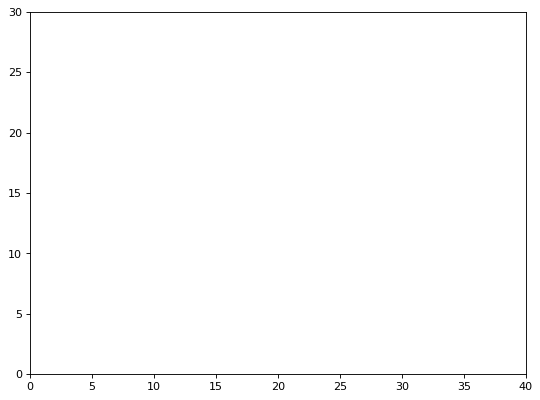

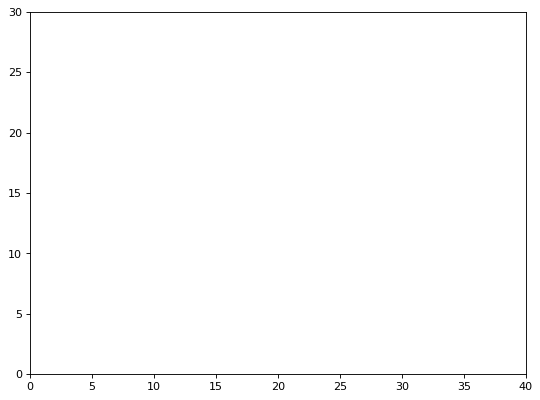

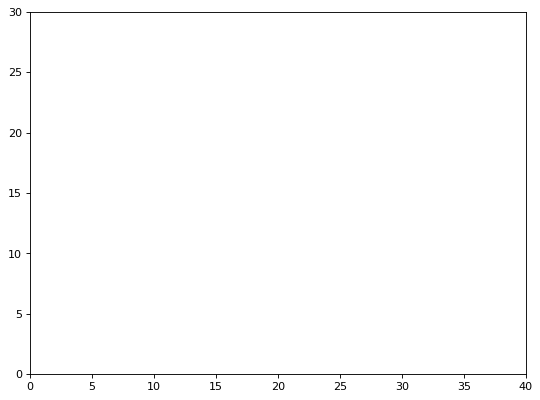

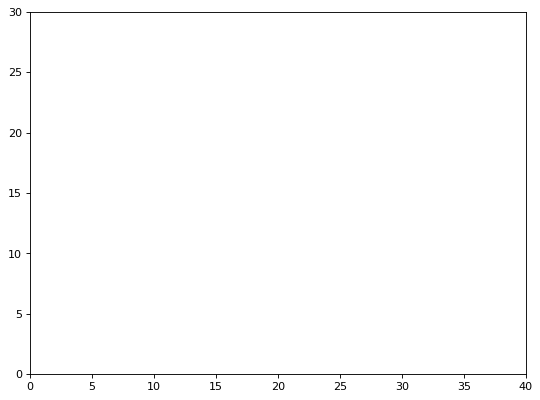

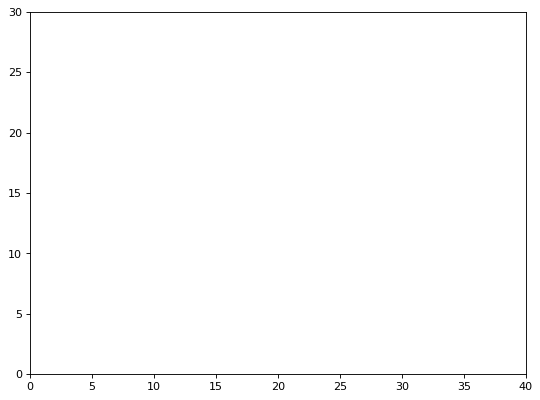

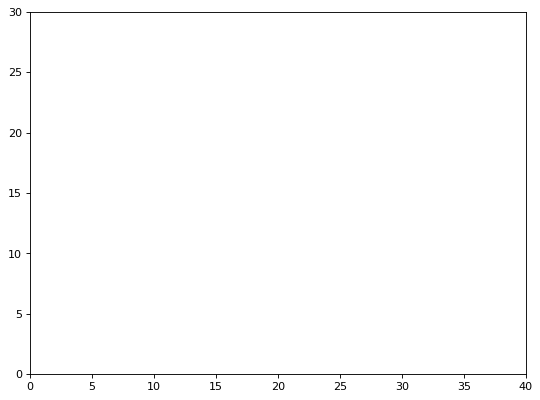

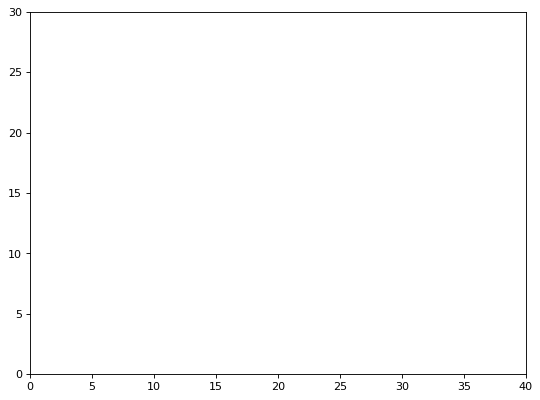

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
def coordenadas(o1,o2):
    a=15
    b=5
    d=7
    o3=30
    x=np.empty((11))
    y=np.empty((11))
    x[0]=8
    y[0]=1
    x[1]=x[0]+a*np.cos((180-o1)/180*np.pi)
    y[1]=y[0]+a*np.sin((180-o1)/180*np.pi)

    x[2]=x[1]+a*np.cos((180-o2)/180*np.pi)
    y[2]=y[1]-a*np.sin((180-o2)/180*np.pi)

    x[3]=x[1]-b*np.cos((180-o2)/180*np.pi)
    y[3]=y[1]+b*np.sin((180-o2)/180*np.pi)

    x[4]=x[0]-b*np.cos((180-o2)/180*np.pi)
    y[4]=y[0]+b*np.sin((180-o2)/180*np.pi)

    x[5]=x[0]-0.01
    y[5]=y[0]

    x[6]=x[0]-d*np.cos(o3/180*np.pi)
    y[6]=y[0]+d*np.sin(o3/180*np.pi)
    x[7]=x[1]-d*np.cos(o3/180*np.pi)
    y[7]=y[1]+d*np.sin(o3/180*np.pi)

    x[8]=x[1]
    y[8]=y[1]+d*np.sin(o3/180*np.pi)

    x[9]=x[2]
    y[9]=y[2]+d*np.sin(o3/180*np.pi)

    x[10]=x[2]+4
    y[10]=y[2]
    return(x,y)
@interact(o1=(90,180),o2=(90,180))
def dibujo_brazo(o1,o2):
    fig = plt.figure()
    fig.set_dpi(80)
    fig.set_size_inches(8, 6)
    ax = plt.axes(xlim=(0, 40), ylim=(0, 30))
    [x,y]=coordenadas(o1,o2)
    point1 = [[x[0], y[0]], [x[1],y[1]]]
    point2 = [[x[2], y[2]], [x[3],y[3]]]
    point3 = [[x[3], y[3]], [x[4],y[4]], [x[5],y[5]]]
    point4 = [[x[0], y[0]], [x[6],y[6]],[x[7],y[7]], [x[1],y[1]]]
    point5 = [[x[7], y[7]], [x[8],y[8]],[x[1],y[1]]]
    point6 = [[x[8], y[8]], [x[9],y[9]],[x[2],y[2]],[x[10],y[10]]]          
            
    lin1 = plt.Polygon(point1, closed=None, fill=None, edgecolor='b', linewidth=4)
    lin2 = plt.Polygon(point2, closed=None, fill=None, edgecolor='g', linewidth=4)
    lin3 = plt.Polygon(point3, closed=None, fill=None, edgecolor='black', linewidth=2)
    lin4 = plt.Polygon(point4, closed=None, fill=None, edgecolor='y', linewidth=2)
    lin5 = plt.Polygon(point5, closed=None, fill=None, edgecolor='y', linewidth=2)
    lin6 = plt.Polygon(point6, closed=None, fill=None, edgecolor='y', linewidth=2)                                     
    rectangulo=plt.Rectangle((4,0),8,1,0,color="red")
    to1= 'o1'+'{:03d}'.format(int(o1))
    ser.write(bytearray(to1,'utf-8'))
    to2= 'o2'+'{:03d}'.format(int(o2))                      
    ser.write(bytearray(to2,'utf-8'))
    ax.add_line(lin1)
    ax.add_line(lin2)
    ax.add_line(lin3)
    ax.add_line(lin4)
    ax.add_line(lin5)
    ax.add_line(lin6)
    ax.add_patch(rectangulo)
    return(x[2],y[2])


## Conclusiones

En este cuaderno se muestra la construccion de un brazo con dos grados de libertad.Se analizo la geometria del mismo. Se proponen los circuitos electronicos. El firmware necesario para que funcione y el software necesario para utilizarlo. Se calcula la posicion del punto y se analiza la posibilidad de adicionar una pinza en posicion horizontal.

El brazo tiene algunos defectos que se tratara de mejorar. En este sentido se propone un rediseño del brazo mecanico.
